# PCA->k-means Image Classifier: Step 3

In [1]:
#%load_ext autotime
#%load_ext autoreload
#%autoreload 2

import joblib

from cls import *

Welcome to eht-imaging! v 1.2.4 



## Load PCA

In [2]:
pca = joblib.load('pca-all.joblib')

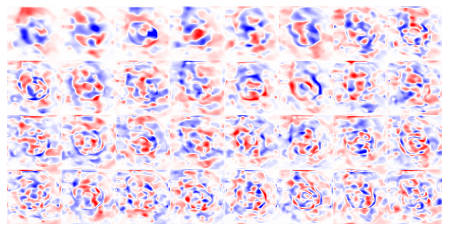

In [3]:
eigenimgs = [pca.components_[i,:].reshape(80,80) for i in range(32)]
plot_grid(eigenimgs, ncol=8, vmin=-0.05, vmax=0.05, cmap='bwr')

## Applying Principal Component Analysis (PCA)

In [4]:
vecs = joblib.load('vecs.joblib')

In [5]:
X_pca = pca.transform(vecs)
print("transformed shape:", X_pca.shape)

transformed shape: (4045, 4045)


0 31 63
1 63 126
2 126 252
3 252 505
4 505 1011
5 1011 2022
6 2022 4045
transformed shape: (4045, 45)


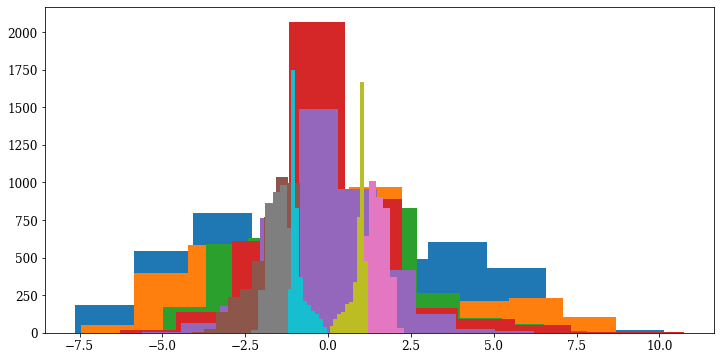

In [6]:
n  = X_pca.shape[1]
nn = [n]
while n > 50:
    n //= 2
    nn = [n] + nn

Y_pca = X_pca[:,:nn[0]]
for i in range(len(nn)-1):
    print(i, nn[i], nn[i+1])
    subset = X_pca[:,nn[i]:nn[i+1]]
    Y_pca = np.concatenate([Y_pca,
                            np.sum(np.where(subset > 0.0, subset, 0.0), axis=-1)[:,np.newaxis],
                            np.sum(np.where(subset < 0.0, subset, 0.0), axis=-1)[:,np.newaxis]], axis=-1)

print("transformed shape:", Y_pca.shape)

plt.rcParams["figure.figsize"] = (12,6)
for i in list(range(0,5)) + list(range(-5,0)):
    plt.hist(Y_pca[:,i])

## Save PCA features

In [7]:
joblib.dump(Y_pca, 'Y.joblib')

['Y.joblib']